In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Predict the percentage of marks of an student based on the number of Study Hours

In [2]:
# Importing the data from the Specific URL

In [3]:
# Reading the data by using the Pandas Library
data = pd.read_csv("http://bit.ly/w-data")

In [4]:
# Verifying if the data has been successfully read
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Seeing a brief overview of given data in terms of both Mathematical analysis and analysis of data
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Using Seaborn to plot the data to understand it better

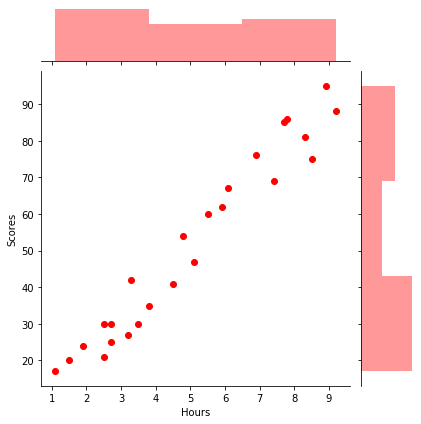

In [8]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='scatter',color='r')

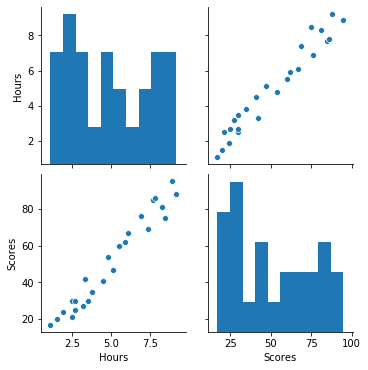

In [9]:
sns.pairplot(data)
            

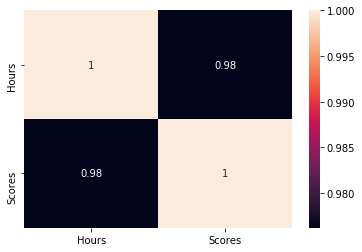

In [10]:
sns.heatmap(data.corr(),annot=True)

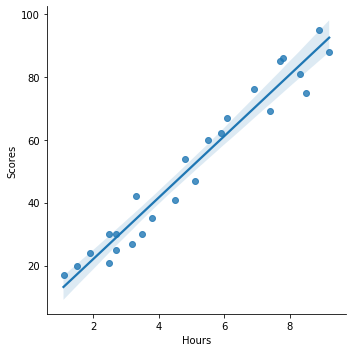

In [11]:
sns.lmplot(x='Hours',y='Scores',data=data)

In [12]:
# Preparing data for training

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [14]:
# Training the Model

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [9.68207815]


In [34]:
# Testing the Model

In [35]:
prediction = lm.predict(X_test)

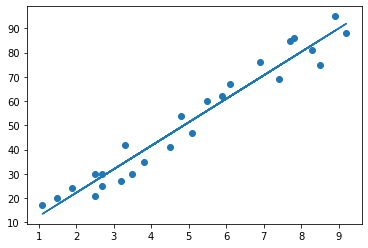

In [36]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [37]:
# Making Predictions

In [38]:
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

In [40]:
# Testing with Dynamic and Real time data
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = [92.38611528]


In [41]:
#Checking the R2 Score 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9678055545167994

# The end 